In [58]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [59]:
def get_coordinate(x: int, y: int): #returns None if invalid coordinate
  x -= 1
  if (y == 0):
    if (x % 2 == 1):
      y += 1
  elif (y == 1): return None
  elif (y >= 33):
    if (y % 2 == 1) or (x % 2 == 0): return None
  else:
    if (x % 2 == 0):
        if (y % 2 == 0): return None
        if ((y - 1) % 4 == 0) and (x % 4 == 0): return None
        if ((y - 1) % 4 != 0) and (x % 4 != 0): return None
    elif (y % 2 == 1): return None

  return (x, y)


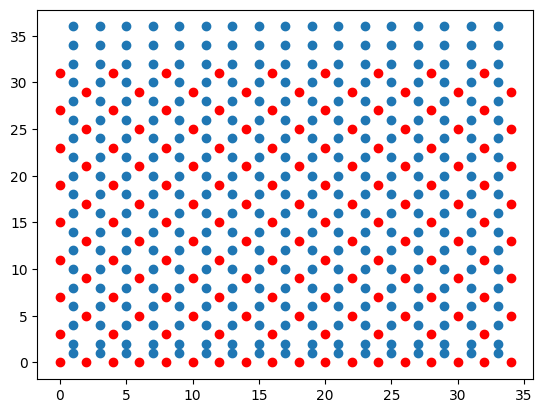

In [60]:
coords = []
coords_screw = []
for x in range(1, 36):
  for y in range(0, 37):
    c = get_coordinate(x, y)
    if (c != None): 
        if (x % 2 == 1): coords_screw.append(c)
        else: coords.append(c)

x_coords, y_coords = [], []
x_coords_screw, y_coords_screw = [], []
for c in coords:
  x_coords.append(c[0])
  y_coords.append(c[1])
for c in coords_screw:
  x_coords_screw.append(c[0])
  y_coords_screw.append(c[1])


plt.plot(x_coords, y_coords, 'o')
plt.plot(x_coords_screw, y_coords_screw, 'o', color='red')

plt.show()

In [66]:
import numpy as np
import sys

# Define grid size (matching your range)
rows, cols = 37, 36  # Adjust if needed

# Initialize 2D array with 0s
grid = np.zeros((rows, cols), dtype=int)

# Populate grid with -1 for invalid coordinates
for x in range(cols):
    for y in range(rows):
        if get_coordinate(x, y) is None:
            grid[y, x] = -1  # Set invalid positions to -1

# Print the grid
np.set_printoptions(threshold=sys.maxsize)
print(grid)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1
   0 -1  0 -1  0 -1  0 -1  0 -1  0 -1]
 [-1  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1
  -1  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1]
 [ 0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1
   0 -1  0 -1  0 -1  0 -1  0 -1  0 -1]
 [-1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  0
  -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  0]
 [ 0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1
   0 -1  0 -1  0 -1  0 -1  0 -1  0 -1]
 [-1  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1
  -1  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1]
 [ 0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1
   0 -1  0 -1  0 -1  0

In [75]:
'''
-- set invalid spaces in 

1. check y level
    - past y = 0
    - between y = 1 and y = 33
    - past y = 33

2. check if its a jib or a bolt (above y = 0)
    - jib: y % 2 == 0
        -  x % 2 == 1

    - bolt y % 2 == 1
        -  x % 2 == 0

3. check validity of jib
    - past y = 0 
    - if y % 4 == 0:
        then skip odd x-coords
    - else:
        then skid even x-coords
'''

def invalidator(x: int,y: int):
    jib, bolt = False, False
    if (y % 2 == 0 and x % 2 == 1):
        jib = True
    if (y % 2 == 1 and x % 2 == 0):
        bolt = True

    if y > 0:
        if (y % 2 == 1 and x % 2 == 1): # inv spaces between bolts
            return None
        elif (y % 2 == 0 and x % 2 == 0): # inv spaces between jibs
            return None
        if (y % 4 == 0 and jib):
            if ((x + 1) % 4 != 0):
                return None
        elif(y % 4 != 0 and jib):
             if ((x + 1) % 4 == 0):
                return None
    if y > 31: 
        if(jib):
            return None
        
    return (x, y)


In [78]:
import numpy as np
import sys

# Define grid size (matching your range)
rows, cols = 36, 36  # Adjust if needed

# Initialize 2D array with 0s
grid = np.zeros((rows, cols), dtype=int)

# Populate grid with -1 for invalid coordinates
for x in range(cols):
    for y in range(rows):
        if invalidator(x, y) is None:
            grid[y, x] = -1  # Set invalid positions to -1
        if (y % 2 == 0 and x % 2 == 1):
            grid[y, x] = 8

# Print the grid
np.set_printoptions(threshold=sys.maxsize)
print(grid)

[[ 0  8  0  8  0  8  0  8  0  8  0  8  0  8  0  8  0  8  0  8  0  8  0  8
   0  8  0  8  0  8  0  8  0  8  0  8]
 [ 0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1
   0 -1  0 -1  0 -1  0 -1  0 -1  0 -1]
 [-1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8
  -1  8 -1  8 -1  8 -1  8 -1  8 -1  8]
 [ 0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1
   0 -1  0 -1  0 -1  0 -1  0 -1  0 -1]
 [-1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8
  -1  8 -1  8 -1  8 -1  8 -1  8 -1  8]
 [ 0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1
   0 -1  0 -1  0 -1  0 -1  0 -1  0 -1]
 [-1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8
  -1  8 -1  8 -1  8 -1  8 -1  8 -1  8]
 [ 0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1
   0 -1  0 -1  0 -1  0 -1  0 -1  0 -1]
 [-1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8 -1  8
  -1  8 -1  8 -1  8 -1